#### **MNIST MLP with Keras**

This is a template of an MNIST classifier with an Artificial Neural Network (MLP)
If follows the basic blocks of a Deep Learning classifier

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import ReLU, Dense, Softmax
from tensorflow.keras.models import Model


In [2]:

# Hyperparameters

num_classes = 10  # this is the number of digits
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### **Reading MNIST Dataset**
Most frameworks offer an easy way to download the MNIST dataset. In this case we use the datasets method

This is the way that Keras reads the dataset



In [3]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
type(x_train)
# The loaded data are numpy arrays

numpy.ndarray

In [5]:
# Data Preprocessing
# Preprocess the data (flattening and normalization)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### **ANN architecture definition**
This is the key part of the notebook, in this cell we define the structure of the network 
and all the different elements mainly

- Activation function 
- Layer size
- Number of layers

In this example you have 3 models. Give them a try. To use one model or the other just make sure the model() construct is based on the parameters you want to try 

(you can do this by deleting the line "model()=" in the models you don't want to use)


In [6]:
# MLP Model 1 hidden layer input size 784, output layer 10 (num of classes)
# ANN sizing details
hidden_size = 256

inputs = Input(shape= (784,))
l1 = Dense(hidden_size)(inputs)
l1 = ReLU()(l1)
l1 = Dense(10)(l1)
output = Softmax()(l1)

model = Model(inputs=inputs, outputs=output)

I0000 00:00:1736764144.659726    2228 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736764144.785354    2228 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736764144.785392    2228 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736764144.789077    2228 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736764144.789772    2228 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

Epoch 1/5


I0000 00:00:1736764147.282666    2313 service.cc:146] XLA service 0x7ff0fc009090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736764147.282693    2313 service.cc:154]   StreamExecutor device (0): NVIDIA T600 Laptop GPU, Compute Capability 7.5


140/480 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7448 - loss: 0.9028

I0000 00:00:1736764149.172646    2313 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8469 - loss: 0.5457 - val_accuracy: 0.9516 - val_loss: 0.1698
Epoch 2/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9571 - loss: 0.1497 - val_accuracy: 0.9649 - val_loss: 0.1258
Epoch 3/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0984 - val_accuracy: 0.9682 - val_loss: 0.1056
Epoch 4/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0672 - val_accuracy: 0.9729 - val_loss: 0.0904
Epoch 5/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0519 - val_accuracy: 0.9753 - val_loss: 0.0849


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 1s - 3ms/step - accuracy: 0.9756 - loss: 0.0759
Test accuracy: 97.56%


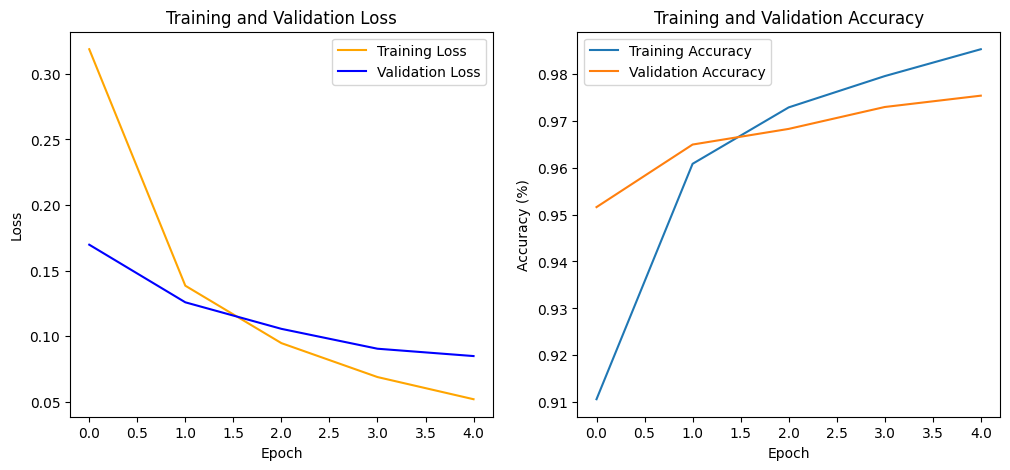

In [9]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [10]:
import session_info
session_info.show(html=False)

-----
keras               3.6.0
matplotlib          3.9.2
numpy               1.26.4
session_info        1.0.0
tensorflow          2.17.1
-----
IPython             8.28.0
jupyter_client      8.6.3
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Nov  6 2024, 18:32:19) [GCC 13.2.0]
Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2025-01-13 11:29


# 